In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv
/kaggle/input/int303-big-data-analysis-2223-S1/sample_submission.csv
/kaggle/input/int303-big-data-analysis-2223-S1/train.csv
/kaggle/input/int303-big-data-analysis-2223-S1/test.csv


In [2]:

# Data and stats packages
import numpy as np
import pandas as pd
import plotly.express as px

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsclassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder





# NEW PACKAGES
from sklearn.decomposition import PCA
from time import time


# Other packages
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

#employee satisfaction, income, seniority, and demographics data. 
based on Filter methods - Eg. Correlation our Mutual Information 
between each feature and the response variable

In [3]:

testData = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/test.csv')
trainData = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/train.csv')

trainData2 = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/train.csv')
testData2 = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/test.csv')
#employee satisfaction, income, seniority, and demographics data. 


#  Exploratory Data analysis


Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.



In [4]:
trainData.head()
testData.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,NaN,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,37,NaN,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
2,29,NaN,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,12,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8
3,34,NaN,Travel_Rarely,1346,Research & Development,19,2,Medical,1,14,2,Male,93,3,1,Laboratory Technician,4,Divorced,2661,8758,0,Y,No,11,3,3,80,1,3,2,3,2,2,1,2
4,22,NaN,Non-Travel,1123,Research & Development,16,2,Medical,1,18,4,Male,96,4,1,Laboratory Technician,4,Divorced,2935,7324,1,Y,Yes,13,3,2,80,2,1,2,2,1,0,0,0


In [5]:
testData.shape
trainData.shape

(1103, 35)

In [6]:
# find the ranges of all features
trainData.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.0,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.0,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,36.697189,810.515866,9.296464,2.943790,1.0,742.293744,2.731641,65.805984,2.733454,2.075249,2.718948,6481.290118,14394.726201,2.657298,15.233908,3.153218,2.696283,80.0,0.764279,11.212149,2.792384,2.773345,7.004533,4.223935,2.143246,4.150499
std,9.075448,405.943336,8.150026,1.012855,0.0,426.965196,1.081341,20.186842,0.710075,1.117731,1.093984,4719.804196,7056.403020,2.462506,3.669620,0.360361,1.073207,0.0,0.830844,7.806784,1.308029,0.702172,6.124760,3.608279,3.203527,3.579410
min,18.000000,103.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,467.500000,2.000000,2.000000,1.0,369.500000,2.000000,48.000000,2.000000,1.000000,2.000000,2906.500000,8245.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,805.000000,7.000000,3.000000,1.0,740.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4900.000000,14394.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,1.0,1116.500000,4.000000,83.000000,3.000000,3.000000,4.000000,7989.500000,20435.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,1470.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [7]:
#check the correlation among features
px.imshow(trainData.corr(),text_auto=True, aspect="auto",color_continuous_scale="viridis")

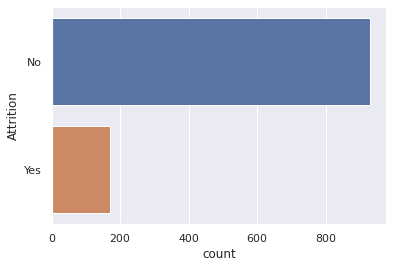

In [8]:
#check the balance of the data
sns.countplot(y = trainData.Attrition)
plt.show()

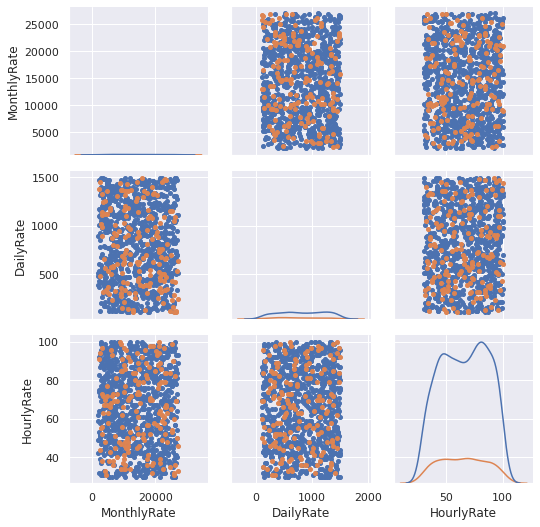

In [9]:
#check relationship among different features about "rate"
g = sns.PairGrid(trainData, vars=['MonthlyRate', 'DailyRate', 'HourlyRate'], hue="Attrition") 
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=16)

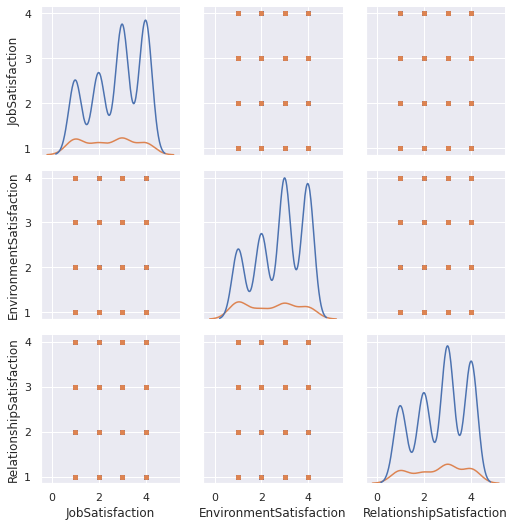

In [10]:
#features about satisfaction among employees
g = sns.PairGrid(trainData, vars=['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction'], hue="Attrition") 
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=16)

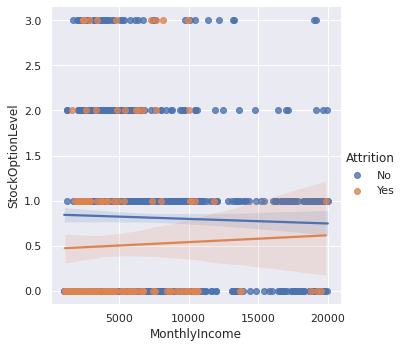

In [11]:
#features about financial conditions of employees
sns.lmplot(x='MonthlyIncome',y='StockOptionLevel',data=trainData, hue='Attrition')

# Drop useless columns

In [12]:
trainData.EmployeeCount!=1
trainData.Over18!='Y'
testData.EmployeeCount!=1
testData.Over18!='Y'

0      False
1      False
2      False
3      False
4      False
       ...  
362    False
363    False
364    False
365    False
366    False
Name: Over18, Length: 367, dtype: bool

In [13]:
del trainData['EmployeeCount']
del trainData['Over18']
del trainData['EmployeeNumber']
del trainData['StandardHours']

del testData['EmployeeCount']
del testData['Over18']
del testData['EmployeeNumber']
del testData['StandardHours']

#target='Attrition'
#features=[col for col in trainData.columns if col !=target]



In [14]:
trainData.shape
testData.shape

(367, 31)

# Deal with missing value

In [15]:
 #deal with missing value
trainData.dropna()
trainData.shape
#Therefore,no missing value in the dataframe

(1103, 31)

In [16]:
#Select categorical columns
categorical_cols = [cname for cname in trainData.columns if 
                    trainData[cname].nunique() < 23 and
                    trainData[cname].dtype =='object']

#Select numerical columns 
numerical_cols =[cname for cname in trainData.columns if trainData[cname].dtype in 
                ['float64', 'int64']]



# Remove Outliers

In [17]:
#Use interquantile to detect and delete outliers
#numerical dataframe
noout_train=trainData[numerical_cols]
print("Old Shape: ", trainData.shape)

''' Detection '''
# IQR
for i in noout_train:
    Q1 = np.percentile( noout_train[i], 25, interpolation = 'midpoint')


    Q3 = np.percentile(noout_train[i] , 75, interpolation = 'midpoint')

    IQR = Q3 - Q1
    
    # Upper bound
    upper = np.where( noout_train[i] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where( noout_train[i] <= (Q1-1.5*IQR))

''' Removing the Outliers '''

trainData.drop(upper[0], inplace = True)
trainData.drop(lower[0], inplace = True)

print("New Shape: ", trainData.shape)

Old Shape:  (1103, 31)
New Shape:  (1091, 31)


# Scaling

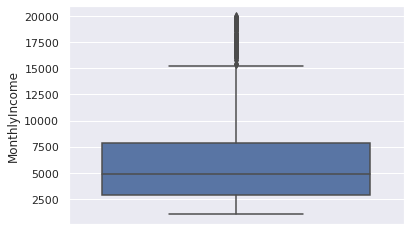

In [18]:
#The distribution of MonthlyIncome is imbalance
sns.boxplot(y='MonthlyIncome',data=trainData);

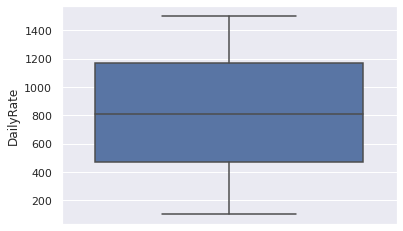

In [19]:
#The scale of DailyRate is inconsistant with other features
sns.boxplot(y='DailyRate',data=trainData);

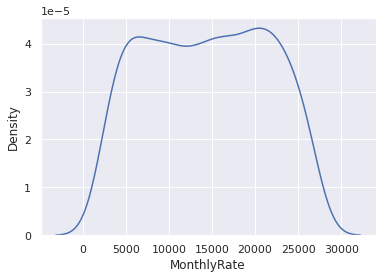

In [20]:
#the range of monthly Rate is imbalance
sns.kdeplot(trainData.MonthlyRate);

In [21]:
#scale the large data in train and test dataset
X1=trainData.MonthlyIncome
trainData.MonthlyIncome = preprocessing.scale(X1)
X2=trainData.MonthlyRate
trainData.MonthlyRate = preprocessing.scale(X2)
X3=trainData.DailyRate
trainData.DailyRate = preprocessing.scale(X3)

X4=testData.MonthlyIncome
testData.MonthlyIncome = preprocessing.scale(X4)
X5=testData.MonthlyRate
testData.MonthlyRate = preprocessing.scale(X5)
X6=trainData.DailyRate
trainData.DailyRate = preprocessing.scale(X6)



# Encoding

In [22]:
#encode catergorical variable of attrition
#train=pd.get_dummies(trainData)
#train.dtypes



#encode all non-numerical features
def lable_encoder(train,test,columns):
    for col in columns:
        trainData[col]=trainData[col].astype(str)
        testData[col]=testData[col].astype(str)
        trainData[col]=LabelEncoder().fit_transform(trainData[col])
        testData[col]=LabelEncoder().fit_transform(testData[col])
    return trainData,testData
 

train,test = lable_encoder(trainData,testData,categorical_cols)

#train.dtypes

In [23]:
features=train.drop('Attrition',axis=1)
target=train['Attrition']

#split train and validation data set
x_train, x_valid, y_train, y_valid = train_test_split(features,target, random_state=0)

# test set
x_test = test.drop(['Attrition'], axis=1)
y_test = test['Attrition']


#  Models
1. models before feature selection
 1.1 logistic regression model
 1.2 decision tree model
 1.3 after compare scores in Kaggle, the models using selected features perform better.

2. feature selection based on random forest 
3. models after feature selection
 3.1 random forest 
 3.2 decision tree
 3.3 logistic regression
 3.4 xgtboost


# -Before features selection

In [24]:
#logistic model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print("Test score: {:.2f}".format(logreg.score(x_train, y_train)))
print("Test score: {:.2f}".format(logreg.score(x_valid, y_valid)))


Test score: 0.88
Test score: 0.87


In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on validation set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_valid, y_valid)))

Accuracy on validation set: 0.885
Accuracy on test set: 0.835


In [26]:
trainData_tem= trainData.drop(['Attrition'],axis = 1)

# -After feature selection

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
 RandomForestClassifier(n_estimators=100, random_state=42),
 threshold="median")

In [28]:
select.fit(x_train, y_train)
X_train_s = select.transform(x_train)
X_test_s = select.transform(x_test)
X_valid_s = select.transform(x_valid)

print("X_train.shape: {}".format(x_train.shape))
print("X_train_s.shape: {}".format(X_train_s.shape))


X_train.shape: (818, 30)
X_train_s.shape: (818, 15)


Text(0.5, 0, 'Sample index')

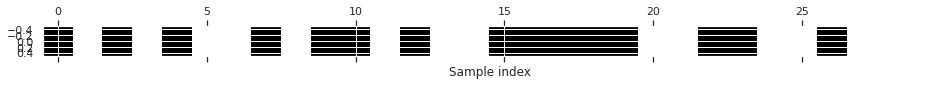

In [29]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

# -Grid Research for tuning parameters

In [30]:
# test optimal max_depth for tree_s model by grid research
from sklearn.model_selection import GridSearchCV
param = {'criterion':['gini'],'max_depth':[2,3,4,5,10],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=6)
grid.fit(X_train_s,y_train)
print('best tree:',grid.best_params_,'best score:', grid.best_score_)


best tree: {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} best score: 0.8361957921854873


In [31]:
#Desicion tree model
tree_s = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_s.fit(X_train_s, y_train)
print("train set: {:.3f}".format(tree_s.score(X_train_s, y_train)))
print("validation set: {:.3f}".format(tree_s.score(X_valid_s, y_valid)))

train set: 0.851
validation set: 0.875


In [32]:
#Ramdon forest model
rfs=RandomForestClassifier().fit(X_train_s, y_train)
#rfs.predict(X_test_s)
print("Train score: {:.2f}".format(rfs.score(X_train_s, y_train)))
print("Validation score: {:.2f}".format(rfs.score(X_valid_s, y_valid)))

Train score: 1.00
Validation score: 0.88


In [33]:
#logistic regression model
logreg_s = LogisticRegression()
logreg_s.fit(X_train_s, y_train)
print("train score: {:.2f}".format(logreg_s.score(X_train_s, y_train)))
print("validation score: {:.2f}".format(logreg_s.score(X_valid_s, y_valid)))

train score: 0.87
validation score: 0.85


In [34]:
#xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(X_train_s, y_train)
print("Train score: {:.2f}".format(xgb.score(X_train_s, y_train)))
print("Validation score: {:.2f}".format(xgb.score(X_valid_s, y_valid)))

Train score: 1.00
Validation score: 0.84


In [35]:
y_test = pd.DataFrame(testData2['EmployeeNumber'])

In [36]:
y_test['Attrition']=tree_s.predict(X_test_s)
y_test

,EmployeeNumber,Attrition
0,1,0
1,3,0
2,12,0
3,14,0
4,18,1
...,...,...
362,1437,0
363,1440,0
364,1441,0
365,1459,0


In [37]:
y_test['Attrition'].replace(1, 'Yes',inplace=True)
y_test['Attrition'].replace(0, 'No',inplace=True)

y_test

,EmployeeNumber,Attrition
0,1,No
1,3,No
2,12,No
3,14,No
4,18,Yes
...,...,...
362,1437,No
363,1440,No
364,1441,No
365,1459,No


In [38]:
y_test.to_csv('submission.csv', index = False)